In [ ]:
# Importando módulos
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
from keras.utils.np_utils import to_categorical

In [ ]:
# Carregando dados para treinamento
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
# Redimensionando imagens para 224x224 de acordo com o artigo
X_train = np.array([cv2.resize(img, (224,224)) for img in x_train[:15000,:,:,:]])
X_valid = np.array([cv2.resize(img, (224,224)) for img in x_test[:1500,:,:,:]])

Y_train = keras.utils.to_categorical(y_train[:15000], 10)
Y_valid = keras.utils.to_categorical(y_test[:1500], 10)

In [ ]:
# Montando a AlexNet utilizando keras
AlexNet = keras.Sequential([
  keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), input_shape=(224,224,3), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
  #2 Conv
  keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
  #3 Conv
  keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  #4 Conv
  keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  #5 Conv
  keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),

  keras.layers.Flatten(),
  keras.layers.Dense(4096, input_shape=(224,224,3)),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.Dropout(.4),

  keras.layers.Dense(4096),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.Dropout(.4),

  keras.layers.Dense(1000),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.Dropout(.4),

  keras.layers.Dense(10),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('softmax')
])

In [ ]:
# Compilando e treinando o modelo com 15 epochs
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
AlexNet.fit(X_train, Y_train, epochs=15)

Epoch 1/15
469/469 [==============================] - 61s 119ms/step - loss: 1.6388 - accuracy: 0.4179
Epoch 2/15
469/469 [==============================] - 55s 118ms/step - loss: 1.3753 - accuracy: 0.5247
Epoch 3/15
469/469 [==============================] - 55s 118ms/step - loss: 1.1988 - accuracy: 0.5932
Epoch 4/15
469/469 [==============================] - 55s 118ms/step - loss: 1.0669 - accuracy: 0.6395
Epoch 5/15
469/469 [==============================] - 55s 118ms/step - loss: 0.9329 - accuracy: 0.6913
Epoch 6/15
469/469 [==============================] - 55s 118ms/step - loss: 0.8371 - accuracy: 0.7214
Epoch 7/15
469/469 [==============================] - 55s 118ms/step - loss: 0.7240 - accuracy: 0.7618
Epoch 8/15
469/469 [==============================] - 55s 118ms/step - loss: 0.6256 - accuracy: 0.7970
Epoch 9/15
469/469 [==============================] - 55s 118ms/step - loss: 0.5370 - accuracy: 0.8304
Epoch 10/15
469/469 [==============================] - 55s 118ms/step - l

In [ ]:
# Testando acurácia do modelo
test_loss, test_acc = AlexNet.evaluate(X_valid, Y_valid)

47/47 [==============================] - 3s 54ms/step - loss: 0.9632 - accuracy: 0.7133


In [ ]:
import matplotlib.pyplot as plt
predictions = AlexNet.predict(X_valid)

In [ ]:
predictions[1]

array([1.8623389e-03, 3.2479167e-02, 2.1880013e-03, 7.4321445e-04,
       1.2497919e-03, 5.0954876e-04, 4.9419055e-04, 6.0939480e-04,
       9.5896733e-01, 8.9710520e-04], dtype=float32)

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Predictions


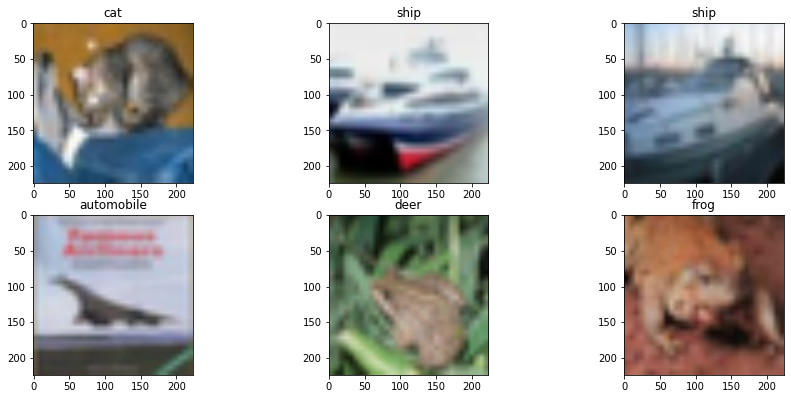

In [ ]:
# Observando predições no conjunto de validação
fig = plt.figure(figsize=(15,10))
print('Predictions')
for i in range(6):
  ax = fig.add_subplot(3,3, i+1)
  ax.imshow(X_valid[i])
  ax.set_title(label_names[prediction_index[i]])